## Exercise 02.1

In questo esercizio vogliamo calcolare il valore del seguente integrale

$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

in due modi differenti. Il primo consiste nell'implementare il metodo della media usando un campionamento uniforme. Nel secondo caso si vuole invece mostrare come l'applicazione dell'importance sampling apporti sostanziali miglioramenti alla stima dell'incertezza. 

Tale metodo consiste nel considerare una distribuzione $p(x)$ che si comporti in modo simile all'integranda, e che sappiamo tuttavia campionare. Questo permette di campionare con maggior frequenza quelle zone in cui la funzione integranda è diversa da zero, evitando così di "sprecare" punti.

Scegliamo $p(x)=2(1-x)$, facilmente invertibile, definita positiva, normalizzata in $[0,1]$ e sufficientemente simile all'intgranda:

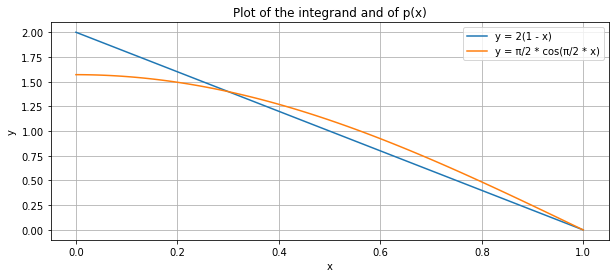

In [90]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 100)

y1 = 2 * (1 - x)
y2 = np.pi/2 * np.cos(np.pi/2 * x)

plt.figure(figsize=(10,4))
plt.plot(x, y1, label='y = 2(1 - x)')
plt.plot(x, y2, label='y = π/2 * cos(π/2 * x)')

plt.xlabel('x')
plt.ylabel('y')

plt.title('Plot of the integrand and of p(x)')
plt.legend()

plt.grid(True)
plt.show()

Nel dominio di interesse l'inversa della funzione cumulativa di p(x) è data da $x=1-\sqrt{1-y}$.

Vediamo quindi i risultati ottenuti con il campionamento uniforme, sono stati usati $10^6$ campionamenti suddivisi in 100 blocchi.

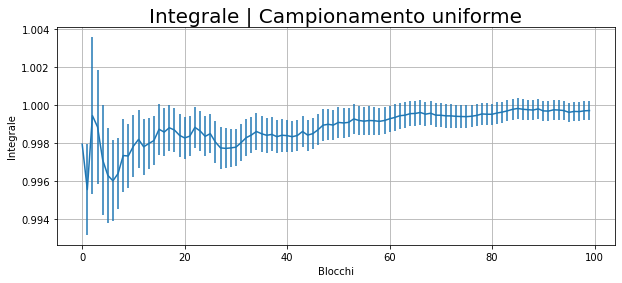

In [94]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

sum_prog, err_prog = np.loadtxt("c++/output/outfile211.txt", unpack=True)

N=sum_prog.shape[0]
x=np.arange(N)

plt.figure(figsize=(10,4))
plt.errorbar(x,sum_prog,yerr=err_prog)
plt.title("Integrale | Campionamento uniforme", fontsize=20)
plt.xlabel('Blocchi')
plt.ylabel('Integrale')
plt.grid(True)
plt.show()

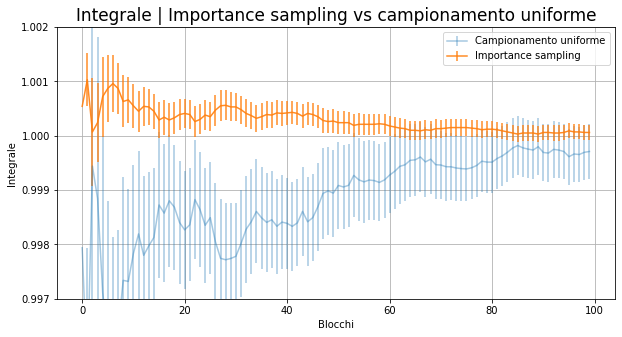

In [95]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

sum_prog, err_prog = np.loadtxt("c++/output/outfile212.txt", unpack=True)
sum_progUn, err_progUn = np.loadtxt("c++/output/outfile211.txt", unpack=True)

N=sum_prog.shape[0]
x=np.arange(N)

plt.figure(figsize=(10,5))
plt.errorbar(x,sum_progUn,yerr=err_progUn,alpha=0.4, label="Campionamento uniforme")
plt.errorbar(x,sum_prog,yerr=err_prog,alpha=0.9, label="Importance sampling")
plt.title("Integrale | Importance sampling vs campionamento uniforme", fontsize=17)
plt.xlabel('Blocchi')
plt.ylabel('Integrale')
plt.ylim([0.997,1.002])
plt.legend()
plt.grid(True)
plt.show()

Dal grafico risulta immediatamente evidente come l'importance sampling porti a una convergenza più veloce e con incertezze minori. Come già anticipato questo è dovuto al fatto che si va a campionare l'integranda laddove questa si comporta in modo "interessante" ai fini della determinazione dell'integrale.

## Exercise 02.2

In questo esercizio simuliamo un Random Walk tridimensionale, sia su reticolo che in spazio continuo. Si vuole verificare il comportamento diffusivo di $\sqrt{\langle r_{N}^2 \rangle} \sim k\sqrt{N}$

Ho generato $N_{rw}=10^4$ Random Walk di 100 passi ciascuno. Successivamente il data-blocking è stato fatto con 100 blocchi.

### Reticolo

La simulazione su reticolo prevede di generare con eguale probabilià uno spostamento di $\pm 1$ in ogni possibile direzione per ogni passo considerato. Per ogni passo del RW si calcola la distanza dall'origine al quadrato, per tutti i $10^4$ diversi RW. Su queste distanze si fa la media a blocchi, infine si estrae la radice quadrata. Per quanto riguarda le incertezze, queste sono ottenute mediante propagazione degli errori rispetto alle incertezze della distanza al quadrato.

Nei grafici sottostanti viene mostrato il valore della media a blocchi, considerando tutti i possibili $100$ blocchi, per ogni valore di $N$. Anche la deviazione standard è calcolata nel modo usuale considerando l'intero insieme dei blocchi. Viene inoltre fatto un fit con la funzione $k\sqrt{N}$ per valutare la compatibilità e stimare la costante diffusiva $k$.

 --- Random Walk over a discrete lattice --- 
fit with k*sqrt(x): k =  [0.99216767]
confidence over k : +-  [[0.00019641]]


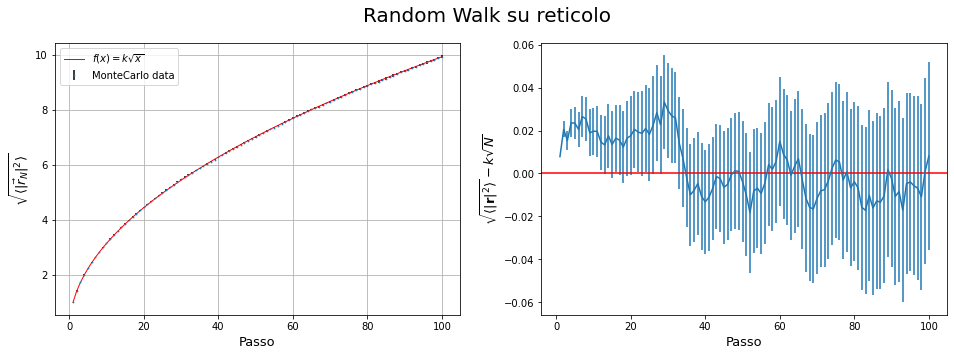

In [96]:
from scipy.optimize import curve_fit

def f (x, k):
    return k * np.sqrt(x)

yD, errD=np.loadtxt("c++/output/outfile221.txt", unpack=True)

N=yD.shape[0]
x=np.arange(1,N+1)

#discrete fit
p_opt_disc, p_cov_disc = curve_fit(f, x, yD)
y_fit = f(x,p_opt_disc[0])

print( ' --- Random Walk over a discrete lattice --- ')
print('fit with k*sqrt(x): k = ',p_opt_disc)
print('confidence over k : +- ',np.sqrt(p_cov_disc))


plt.figure(figsize=(16,5))
plt.suptitle("Random Walk su reticolo",fontsize=20)


plt.subplot(1,2,1)
plt.errorbar(x,yD,errD,fmt='.',label='MonteCarlo data', markersize=1.5, ecolor="black")
y_fitD = f(x,p_opt_disc)
plt.plot(x,y_fitD,'r',linewidth=1,label='$f(x)=k\sqrt{x}$')

plt.grid(True)
plt.xlabel('Passo',fontsize=13)
plt.ylabel(r'$\sqrt{\langle|\vec{r}_{N}|^2\rangle}$',fontsize=13)
plt.legend()

#Differences
plt.subplot(1,2,2)
plt.errorbar(x, yD-f(x,*p_opt_disc), yerr = errD)

plt.xlabel('Passo', fontsize = 13)
plt.ylabel(r'$\sqrt{\langle |\mathbf{r}|^2 \rangle}-k\sqrt{N}$', fontsize = 13)
plt.axhline(y=0, color = 'r', linestyle = '-', linewidth = 1.5)

### Spazio continuo

In questo caso la simulazione è stata fatta generando un angolo $\theta \in [0,\pi]$ e $\phi \in [0,2\pi)$. Tali coordinate identificano una direzione nello spazio tridimensionale. Considerando un passo unitario è così possibile calcolare la nuova posizione Il data-blocking e il calcolo dell'incertezza è stato fatto in modo analogo al caso su reticolo.

 --- Random Walk in a continuum space --- 
fit with k*sqrt(x): k = [1.00056869]
confidence over k : +- [[0.00020583]]


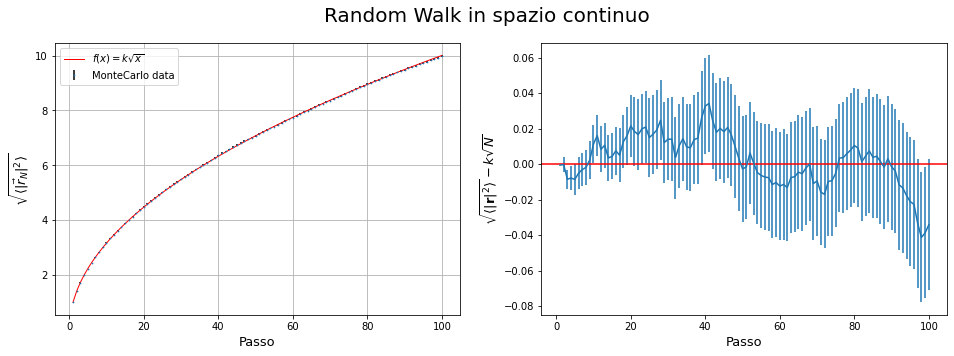

In [97]:
from scipy.optimize import curve_fit

def f (x, k):
    return k * np.sqrt(x)

yC, errC=np.loadtxt("c++/output/outfile222.txt", unpack=True)

N=yC.shape[0]
x=np.arange(1,N+1)

#continuous fit
p_opt_cont, p_cov_cont = curve_fit(f, x, yC)

print( ' --- Random Walk in a continuum space --- ')
print('fit with k*sqrt(x): k = '+str(p_opt_cont))
print('confidence over k : +- '+str(np.sqrt(p_cov_cont)))

plt.figure(figsize=(16,5))
plt.suptitle("Random Walk in spazio continuo",fontsize=20)


plt.subplot(1,2,1)
plt.errorbar(x,yC,errC,fmt='.',label='MonteCarlo data', markersize=1.5, ecolor="black")
y_fitC = f(x,p_opt_cont)
plt.plot(x,y_fitC,'r',linewidth=1,label='$f(x)=k\sqrt{x}$')

plt.grid(True)
plt.xlabel('Passo',fontsize=13)
plt.ylabel(r'$\sqrt{\langle|\vec{r}_{N}|^2\rangle}$',fontsize=13)
plt.legend()

#Differences
plt.subplot(1,2,2)
plt.errorbar(x, yC-f(x,*p_opt_cont), yerr = errC)

plt.xlabel('Passo', fontsize = 13)
plt.ylabel(r'$\sqrt{\langle |\mathbf{r}|^2 \rangle}-k\sqrt{N}$', fontsize = 13)
plt.axhline(y=0, color = 'r', linestyle = '-', linewidth = 1.5)

Sia su reticolo che nello spazio continuo si può apprezzare la sovrapponibilità della simulazione con una legge del tipo $\sim k\sqrt{N}$. La stima di $k$ è inoltre d'accordo con il modello teorico, il quale prevede una costante di diffusione identica alla lunghezza del passo scelto.